<a href="https://colab.research.google.com/github/Aditya1BM22CS017/6A-ML-Lab-Batch2/blob/main/1BM22CS017_Lab_7_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9305

Confusion Matrix:
[[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7   0   0   0   0   0   0   0   0
    0   0   0   0 

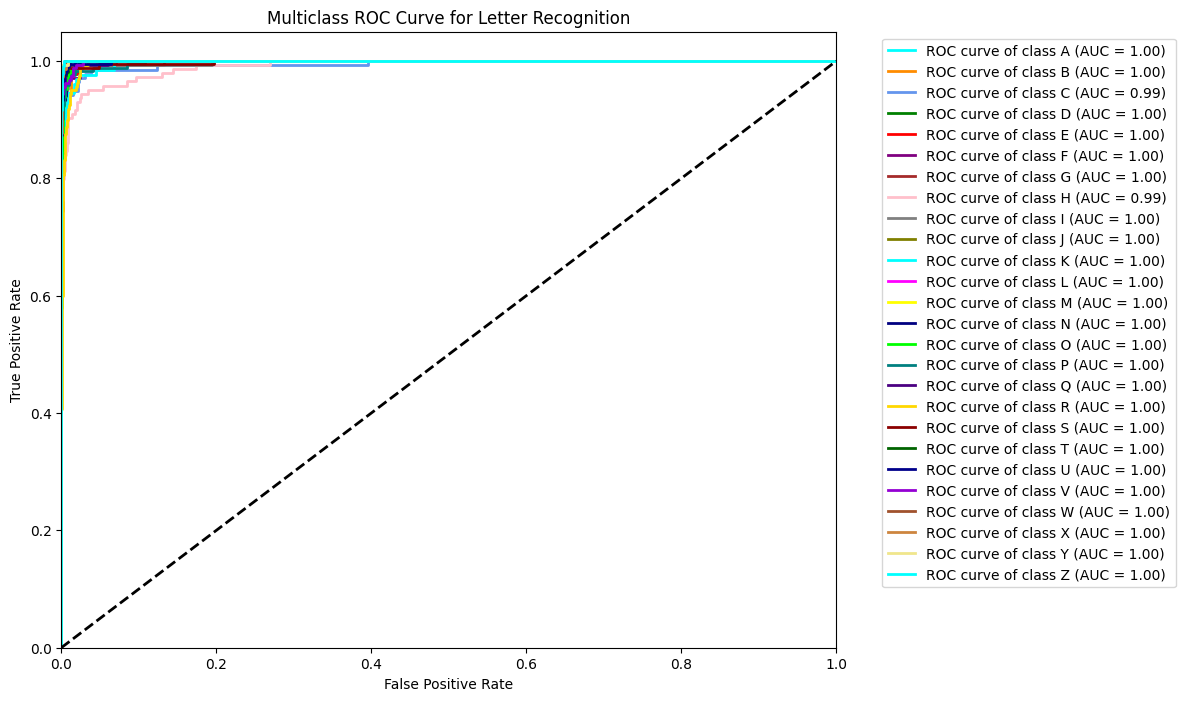


Average AUC: 0.9985


In [ ]:
# letter recognition
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

data = pd.read_csv('letter-recognition.csv')
X = data.drop('letter', axis=1)
y = data['letter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_mat)

y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], svm.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple',
                'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow',
                'navy', 'lime', 'teal', 'indigo', 'gold', 'darkred', 'darkgreen',
                'darkblue', 'darkviolet', 'sienna', 'peru', 'khaki'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(np.unique(y)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for Letter Recognition')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

avg_auc = np.mean(list(roc_auc.values()))
print(f"\nAverage AUC: {avg_auc:.4f}")

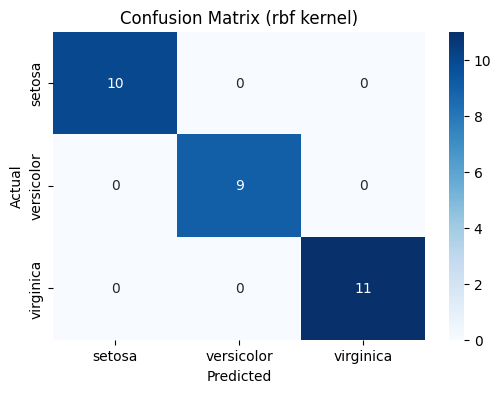

Accuracy with rbf kernel: 1.0000




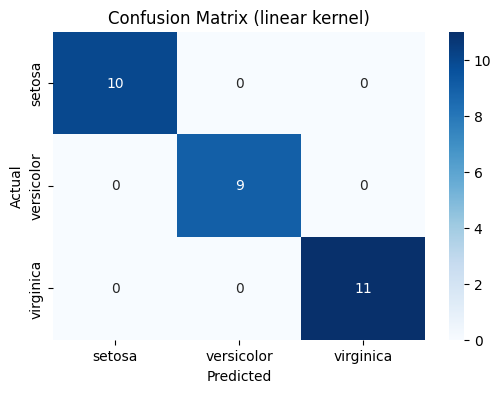

Accuracy with linear kernel: 1.0000




In [ ]:
# IRIS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


iris_df = pd.read_csv('iris.csv')
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_svm(kernel_type):
    # Create SVM classifier
    svm_clf = SVC(kernel=kernel_type, random_state=42)

    # Train the model
    svm_clf.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=svm_clf.classes_,
                yticklabels=svm_clf.classes_)
    plt.title(f'Confusion Matrix ({kernel_type} kernel)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Accuracy with {kernel_type} kernel: {accuracy:.4f}")
    print("\n")

evaluate_svm('rbf')
evaluate_svm('linear')

Accuracy: 1.0
Support Vectors:
 [[145. 380.]
 [140. 350.]]
Number of Support Vectors: 2


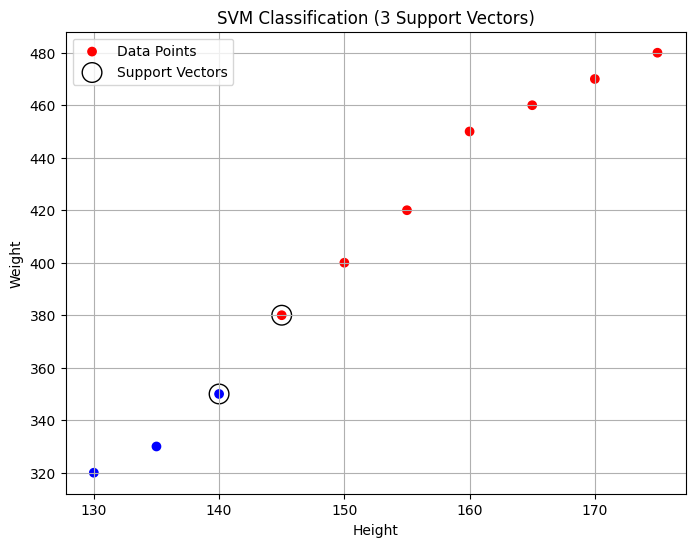

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("horse_mule_data.csv")

# Encode 'Horse'=0, 'Mule'=1
df['Label'] = LabelEncoder().fit_transform(df['Label'])


X = df[['Height', 'Weight']]
y = df['Label']


model = SVC(kernel='linear', C=1000)  # High C -> fewer support vectors
model.fit(X, y)

support_vectors = model.support_vectors_
accuracy = model.score(X, y)

print("Accuracy:", accuracy)
print("Support Vectors:\n", support_vectors)
print("Number of Support Vectors:", len(support_vectors))

colors = ['red' if label == 0 else 'blue' for label in y]
plt.figure(figsize=(8,6))
plt.scatter(X['Height'], X['Weight'], c=colors, label='Data Points')

plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=200, facecolors='none', edgecolors='black', label='Support Vectors')

plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("SVM Classification (3 Support Vectors)")
plt.legend()
plt.grid(True)
plt.show()